# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [3]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess

Prediction: The Target variable takes on only two values: 0 or 1, indicating a binary classification problem. Random forest classifier will likely preform better seeing as by inspecting the data visually there does not seem to be a strong linear relationahip between the different features and the target (spam). Random forest classifier can outperform Logitstic Regression in this case due to tree based nature that allows the model to handle non linearity, inherently capture feature interactions (without the need for manual intervention/explicit data engineering) and handle missing data more grasfully.

Confirming non linearity using scatter plot and correcation caluclation between features and target below (post data split)


*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [4]:
# Create the labels set `y` and features DataFrame `X`
y = data['spam']

X = data.drop(columns=['spam'])

In [5]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

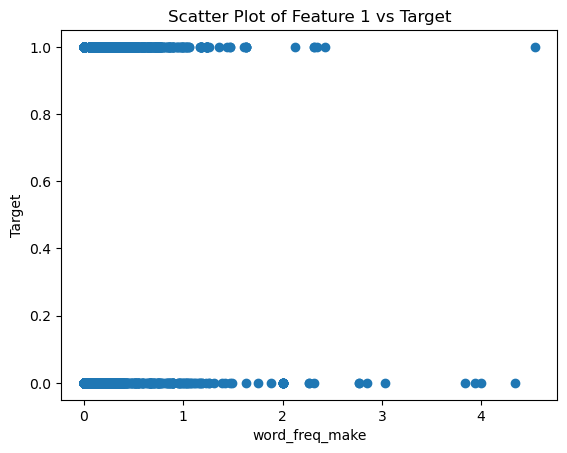

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X['word_freq_make'], y)
plt.xlabel("word_freq_make")
plt.ylabel("Target")
plt.title("Scatter Plot of Feature 1 vs Target")
plt.show()

In [38]:
#confirming non linearity  by caclulating correlation
import pandas as pd
correlation_matrix = pd.concat([X, y], axis=1).corr()
print(correlation_matrix['spam'].sort_values(ascending=False))



spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

In [9]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1173,0.00,0.00,0.00,0.0,0.00,0.00,1.23,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,1.939,0.000,0.000,1.379,8,40
1954,0.67,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.055,0.000,0.000,0.000,0.000,1.644,13,74
256,0.00,0.00,1.42,0.0,0.71,0.00,0.00,0.71,0.00,0.71,...,0.0,0.000,0.000,0.000,0.931,0.000,0.000,12.055,117,217
3341,0.00,0.00,0.24,0.0,0.09,0.04,0.00,0.00,0.04,0.00,...,0.0,0.014,0.148,0.000,0.014,0.044,0.007,2.112,26,1223
4469,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.500,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.122,0.081,0.000,0.000,0.040,3.891,70,323
466,0.00,0.23,0.00,0.0,0.23,0.47,0.00,0.47,0.00,0.95,...,0.0,0.000,0.121,0.040,0.000,0.040,0.000,3.780,55,189
3092,0.00,0.00,0.00,0.0,1.49,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.229,0.000,0.000,0.000,0.000,2.333,10,49
3772,0.00,0.23,0.00,0.0,0.00,0.23,0.00,0.46,0.00,0.00,...,0.0,0.063,0.063,0.000,0.159,0.000,0.000,1.616,13,173


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [10]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()



In [16]:
# Fit the Standard Scaler with the training data
X_train_scaler = scaler.fit(X_train)
X_test_scaler = scaler.fit(X_test)

In [18]:
# Scale the training data
X_train_scaled = X_train_scaler.transform(X_train)
X_test_scaled = X_test_scaler.transform(X_test)


## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [22]:
# Train a Logistic Regression model and print the model score
from networkx import LFR_benchmark_graph
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model instance
LR_model = LogisticRegression()

In [31]:
# Make and save testing predictions with the saved logistic regression model using the test data

LR_model.fit(X_train_scaled, y_train)
LR_predictions = LR_model.predict(X_test_scaled)


# Review the predictions
LR_predictions

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, LR_predictions)

0.9244135534317984

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [27]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier model instance
RF_model = RandomForestClassifier()


In [33]:
# Make and save testing predictions with the saved logistic regression model using the test data
RF_model.fit(X_train_scaled, y_train)

# Review the predictions
RF_predictions = RF_model.predict(X_test_scaled)
RF_predictions

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, RF_predictions)

0.9565595134665508

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

The Random Forrest model did ineed perorm sligtly better than the Logistic Regression model (0.956 vs 0.924). This makes sence given the comfirmation of model non liniarty above.